# References

* The final project:       https://classroom.udacity.com/courses/ud257/lessons/4126079196/concepts/42072285530923
* The project instructions: https://docs.google.com/document/u/1/d/1aCquhIqsUApgsxQ8-SQBAigFDcfWVVohLEXcV6jWbdI/pub?embedded=True
* The template format: https://docs.google.com/document/d/16OX2KDSHI9mSCriyGIATpRGscIW2JmByMd0ITqKYvNg/edit
* The final project results: https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0
* The online calculator "Sample size": http://www.evanmiller.org/ab-testing/sample-size.html
* The online calculator "Sign and binomial test": http://graphpad.com/quickcalcs/binomial1.cfm
* Binomial distribution visualisation: http://databits.io/bits/fbmx-binomial-distribution
* Simple interactive statistical analysis: http://www.quantitativeskills.com/sisa/calculations/bonhlp.htm

# Experiment Design

### Experiment Overview: Free Trial Screener

At the time of this experiment, Udacity courses currently have two options on the home page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.

In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. The screenshot below shows what the experiment looks like.

The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

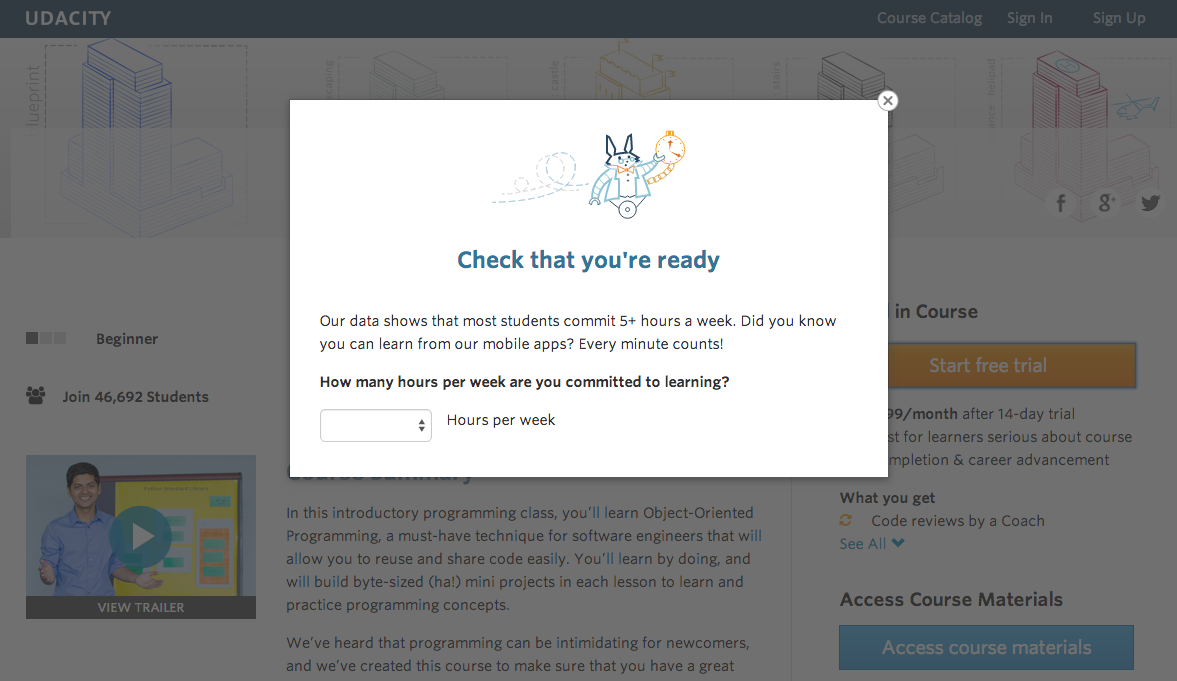

In [4]:
from IPython.display import Image
Image('Final Project_Experiment Screenshot.png')

###  Metric Choice

 Which of the following metrics would you choose to measure for this experiment and why? For each metric you choose, indicate whether you would use it as an invariant metric or an evaluation metric. The practical significance boundary for each metric, that is, the difference that would have to be observed before that was a meaningful change for the business, is given in parentheses. All practical significance boundaries are given as absolute changes.

Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.

* Number of cookies: That is, number of unique cookies to view the course overview page. (dmin=3000)
* Number of user-ids: That is, number of users who enroll in the free trial. (dmin=50)
* Number of clicks: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
* Click-through-probability: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
* Gross conversion: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
* Retention: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
* Net conversion: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)

You should also decide now what results you will be looking for in order to launch the experiment. Would a change in any one of your evaluation metrics be sufficient? Would you want to see multiple metrics all move or not move at the same time in order to launch? This decision will inform your choices while designing the experiment.

List which metrics you will use as invariant metrics and evaluation metrics here.

(These should be the same metrics you chose in the "Choosing Invariant Metrics" and "Choosing Evaluation Metrics" quizzes.)

---

<font color='blue'> 
Invariant metrics (expected to be unchanged in the control and experimental groups):
* number of cookies (cannot be affected by the experiment: users made a decision to visit the page before they were asked the question);
* number of clicks (cannot be affected by the experiment: users clicked the button before they were asked the question);
* click-through probability (cannot be affected by the experiment: it equals to the number of clicks divided by the number of cookies).

Evaluation metrics (expected to be different in the control and experimental groups):
* gross conversion (can be affected by the experiment / can decrease: users could make a decision to enroll in the free trial in the experimental group less than in the control group because they did not plan to learn 5+ hours per week);
* retention (can be affected by the experiment / can increase: enrolled users could be disappointed in the learning process less and make more payments in the experimental group than in the control group because they paid attention to studying 5+ hours per week);
* net conversion (can be affected by the experiment / can decrease: users could enroll in the free trial less in the experimental group than in the control group, thus could decrease the number of people who paid).</font>

The goals of the experiment in the practical meaning:

* the number of payments should not be decreased;
* the number of students who were disappointed and had not paid because they could not study enough time should be reduced.

The goals of the experiment in terms of our metrics:

* the gross conversion should significantly decrease;
* the retention should significantly increase;
* the net conversion should not decrease.

An important remark: the number of user-ids is neither a good invariant metric nor a good evaluation metric.

From one side, the new pop-up message is likely to decrease the total number of user-ids who enrolled in the free trial, so it is not invariant; from the other side it is not normalized, the number of visitors may be different between the experiment and control groups, so it is not good for evaluation.

### Measuring Variability

This list contains rough estimates of the baseline values for these metrics (again, these numbers have been changed from Udacity's true numbers).

* Unique cookies to view page per day: 40000
* Unique cookies to click "Start free trial" per day: 3200
* Enrollments per day: 660
* Click-through-probability on "Start free trial": 0.08
* Probability of enrolling, given click: 0.20625
* Probability of payment, given enroll: 0.53
* Probability of payment, given click 0.1093125

❓ For each metric you selected as an evaluation metric, estimate its standard deviation analytically. Do you expect the analytic estimates to be accurate? That is, for which metrics, if any, would you want to collect an empirical estimate of the variability if you had time?

In [10]:
# Supporting calculation for the standard deviation
import math
print ("5000 × 0.08 × 0.20625 = ", 5000 * 0.08 * 0.20625)
print ("SD Gross conversion = ", math.sqrt(0.20625 * (1 - 0.20625) / 400))
print ("SD Retention = ", math.sqrt(0.53 * (1 - 0.53) / 82.5))
print ("SD Net conversion = ", math.sqrt(0.1093125 * (1 - 0.1093125) / 400))

5000 × 0.08 × 0.20625 =  82.5
SD Gross conversion =  0.020230604137049392
SD Retention =  0.05494901217850908
SD Net conversion =  0.01560154458248846


I would like to expect the analytical variance is close to the empirical variance for the gross conversion and for the net conversion: the denominator for these two indicators is the number of clicks, which is also the unit of diversion.

And it would be useful to collect an empirical estimate of the variability for the retention: the unit of diversion was not used in this case, the empirical variance of the retention is more likely to be higher than the analytical variance.

<font color='blue'>
List the standard deviation of each of your evaluation metrics.

(These should be the answers from the "Calculating standard deviation" quiz.)</font>

* Number of cookies = 5000
* Number of clicks on "Start free trial" = 5000 × 0.08 = 400
* Number of enrollments = 5000 × 0.08 × 0.20625 = 82.5

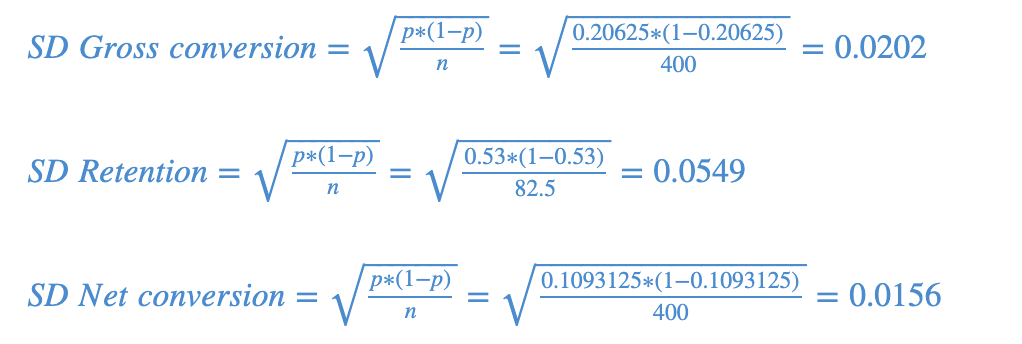

In [14]:
Image('a.png')

### Sizing

Number of Samples vs. Power

❓ Using the analytic estimates of variance, how many pageviews total (across both groups) would you need to collect to adequately power the experiment? Use an alpha of 0.05 and a beta of 0.2. Make sure you have enough power for each metric.

❗ I have used the online calculator (References, N5) for calculating the sample sizes and have chosen the largest.

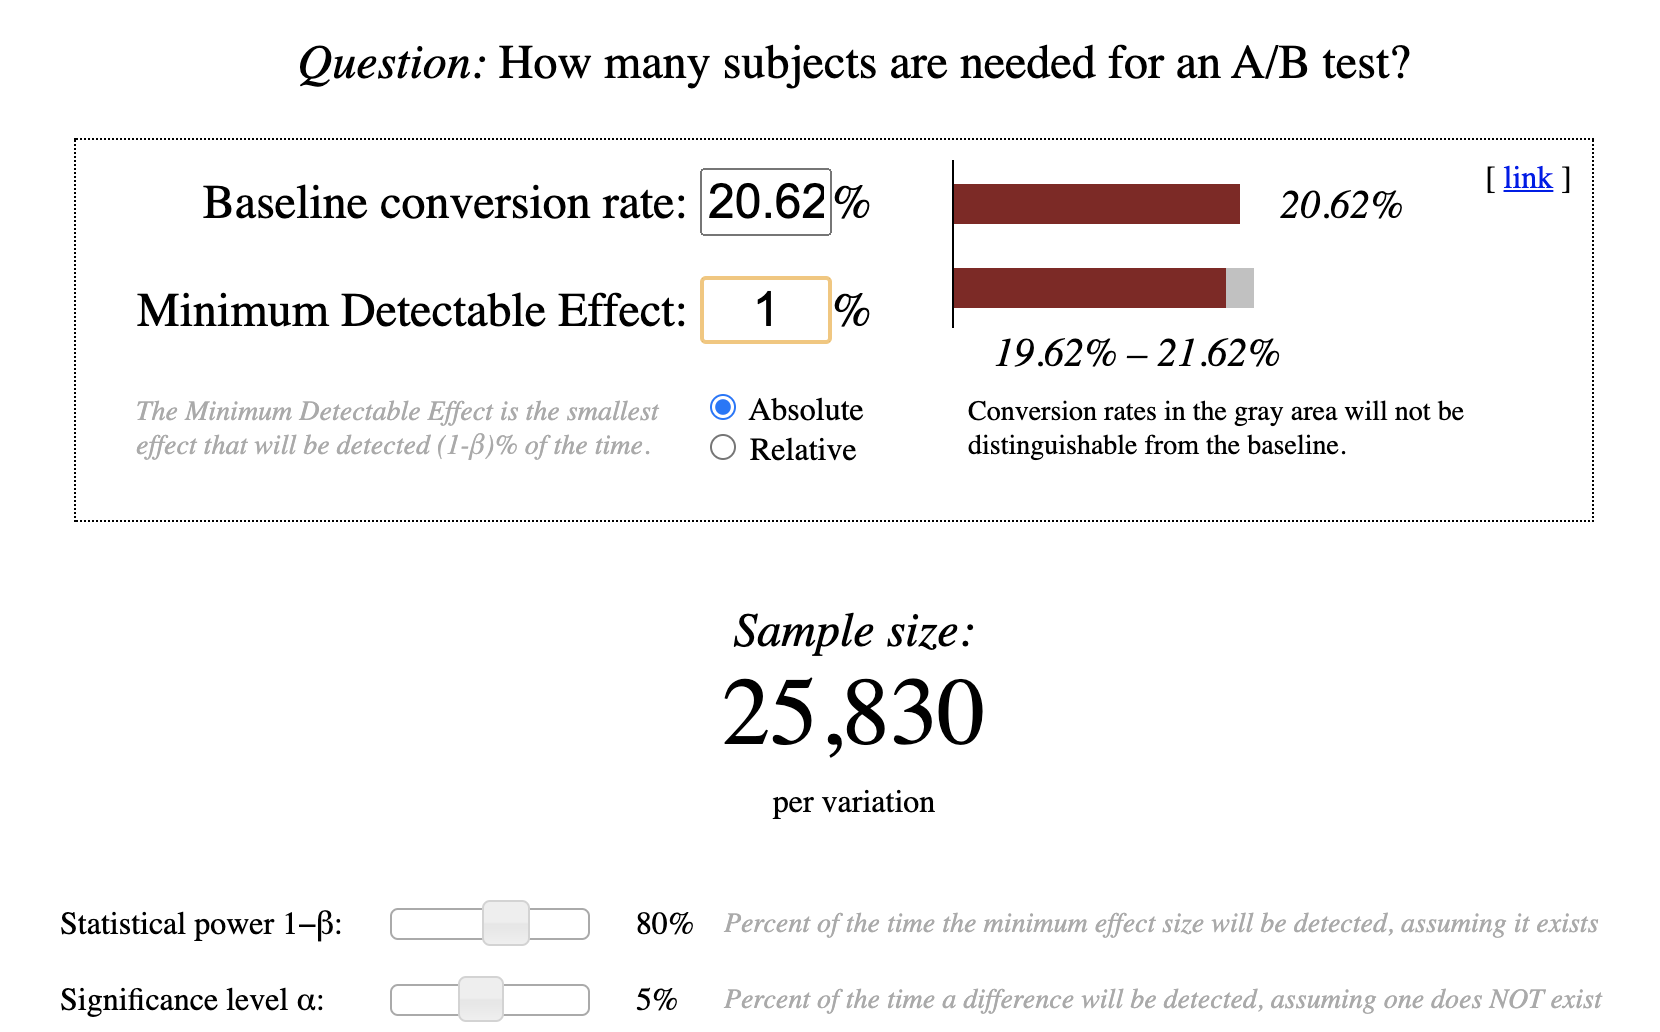

In [15]:
Image('Sample_Gross_conversion_Screenshot.png')

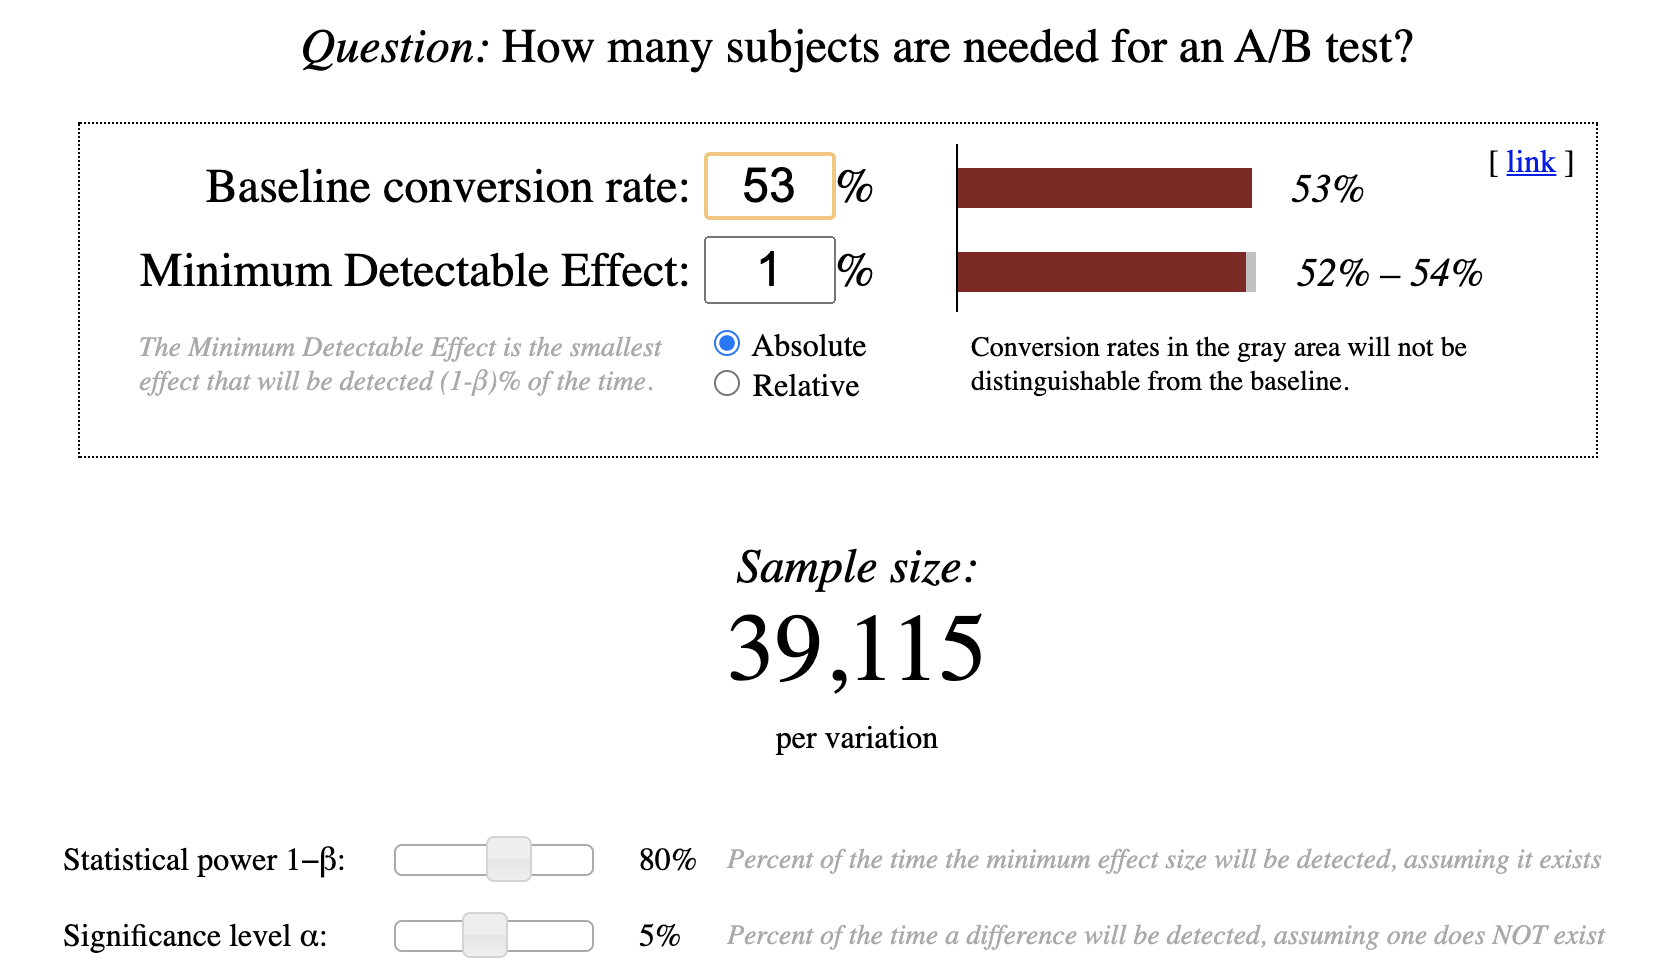

In [16]:
Image('Sample_Retention_Screenshot.png')

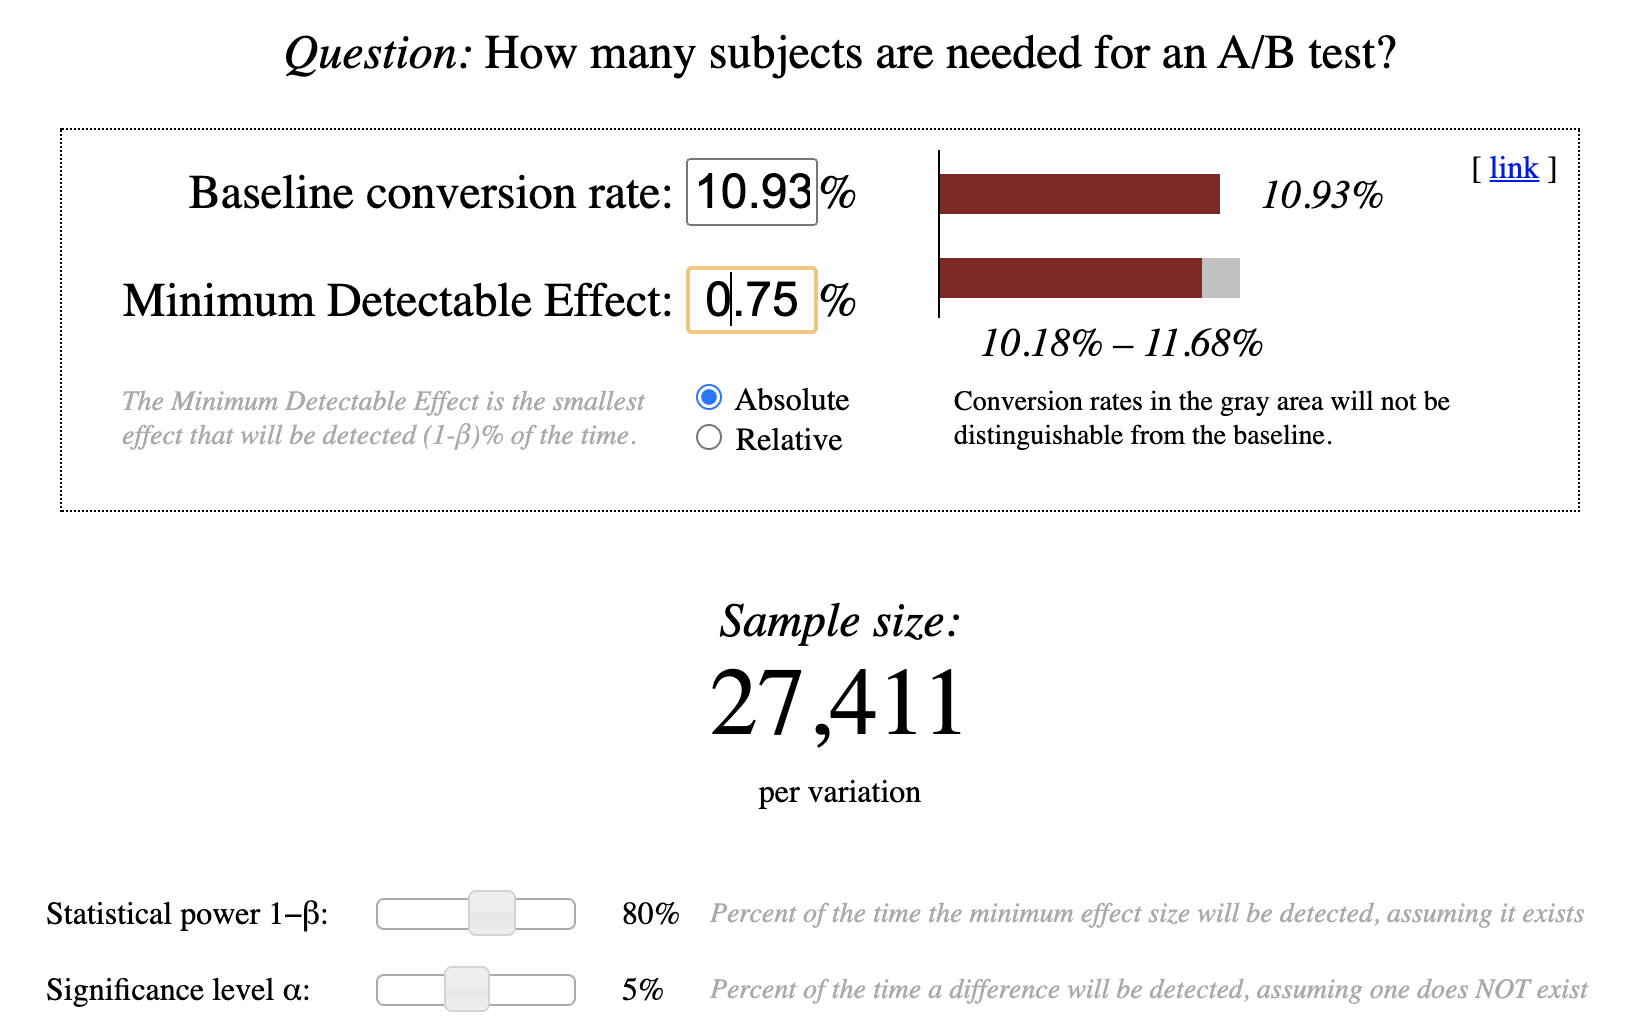

In [17]:
Image('Sample_Net_conversion_Screenshot.png')

In [22]:
# Supporting calculation for the control and experimental groups
print ("Gross conversion: 2 × 25835 × 40000 ÷ 3200 = ", 2 * 25835 * 40000 / 3200.0)
print ("Retention:  2 × 39115 × 40000 ÷ 660 = ", 2 * 39115 * 40000 / 660.0)
print ("Net conversion:  2 × 27413 × 40000 ÷ 3200 = ", 2 * 27413 * 40000 / 3200.0)

Gross conversion: 2 × 25835 × 40000 ÷ 3200 =  645875.0
Retention:  2 × 39115 × 40000 ÷ 660 =  4741212.121212121
Net conversion:  2 × 27413 × 40000 ÷ 3200 =  685325.0


<font color='blue'>
Indicate whether you will use the Bonferroni correction during your analysis phase, and give the number of pageviews you will need to power you experiment appropriately.

(These should be the answers from the "Calculating Number of Pageviews" quiz.)

*  I did not use the Bonferroni correction. 
*  Number of pageviews: 4741212.
</font>

#### Duration vs. Exposure

In [29]:
# Supporting calculation for the number of days
print ("Number of pageviews: 4741212")
print ("(for the experiment with the gross conversion, the retention, and the net conversion)")
print ("Days (100% of the traffic) = 4741212 ÷ 40000 = ", 4741212 / 40000.0)
print()   
print ("Number of pageviews: 685325")
print ("(for the experiment with the gross conversion and the net conversion)")
print ("Days (100% of the traffic) = 685325 ÷ 40000 = ", 685325 / 40000.0 )
print ("Days (60% of the traffic) = 685325 ÷ 40000 ÷ 0.6 = ", 685325 / 40000.0 / 0.6)

Number of pageviews: 4741212
(for the experiment with the gross conversion, the retention, and the net conversion)
Days (100% of the traffic) = 4741212 ÷ 40000 =  118.5303

Number of pageviews: 685325
(for the experiment with the gross conversion and the net conversion)
Days (100% of the traffic) = 685325 ÷ 40000 =  17.133125
Days (60% of the traffic) = 685325 ÷ 40000 ÷ 0.6 =  28.555208333333333


I did not use the Bonferroni correction. 

* Number of pageviews: 685325.

Indicate what fraction of traffic you would divert to this experiment and, given this, how many days you would need to run the experiment.

* Number of pageviews: 685325.
* Fraction of traffic exposed: 0.6.
* Length of experiment: 29.

## Experiment Analysis

This data contains the raw information needed to compute the above metrics, broken down day by day. Note that there are two sheets within the spreadsheet - one for the experiment group, and one for the control group.

The meaning of each column is:

* Pageviews: Number of unique cookies to view the course overview page that day.
* Clicks: Number of unique cookies to click the course overview page that day.
* Enrollments: Number of user-ids to enroll in the free trial that day.
* Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment.

(Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Read the data for the control and experimental groups
control_data = pd.read_csv('Final_Project_Results_Control.csv')
experiment_data = pd.read_csv('Final_Project_Results_Experiment.csv')

In [28]:
control_data2 = control_data[:23]
experiment_data2 = experiment_data[:23]
print("control_data")
print(control_data.head(5))
print()
print("experiment_data")
print(experiment_data.head(5))

control_data
          Date  Pageviews  Clicks  Enrollments  Payments
0  Sat, Oct 11       7723     687        134.0      70.0
1  Sun, Oct 12       9102     779        147.0      70.0
2  Mon, Oct 13      10511     909        167.0      95.0
3  Tue, Oct 14       9871     836        156.0     105.0
4  Wed, Oct 15      10014     837        163.0      64.0

experiment_data
          Date  Pageviews  Clicks  Enrollments  Payments
0  Sat, Oct 11       7716     686        105.0      34.0
1  Sun, Oct 12       9288     785        116.0      91.0
2  Mon, Oct 13      10480     884        145.0      79.0
3  Tue, Oct 14       9867     827        138.0      92.0
4  Wed, Oct 15       9793     832        140.0      94.0


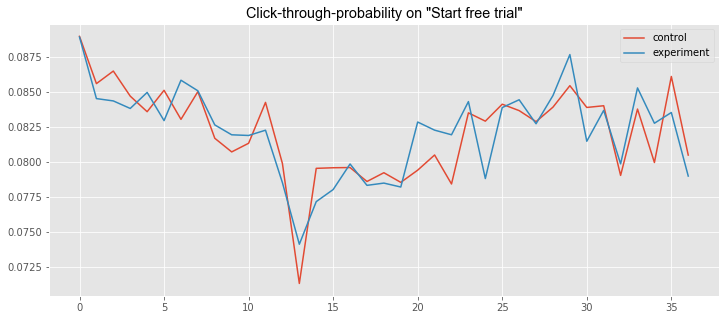

In [32]:
# Plot the metrics
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)
csfont = {'fontname':'Arial'}
plt.title('Click-through-probability on "Start free trial"', **csfont)
line1, = plt.plot(control_data['Clicks']/control_data['Pageviews'], label='control')
line2, = plt.plot(experiment_data['Clicks']/experiment_data['Pageviews'], label='experiment')
plt.legend(handles=[line1, line2])

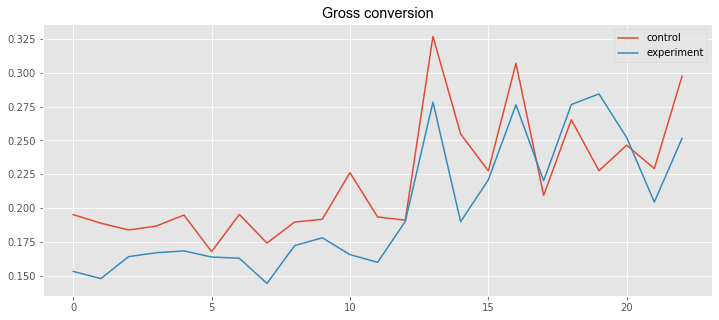

In [33]:
plt.title('Gross conversion', **csfont)
line3, = plt.plot(control_data2['Enrollments']/control_data2['Clicks'], label='control')
line4, = plt.plot(experiment_data2['Enrollments']/experiment_data2['Clicks'], label='experiment')
plt.legend(handles=[line3, line4])

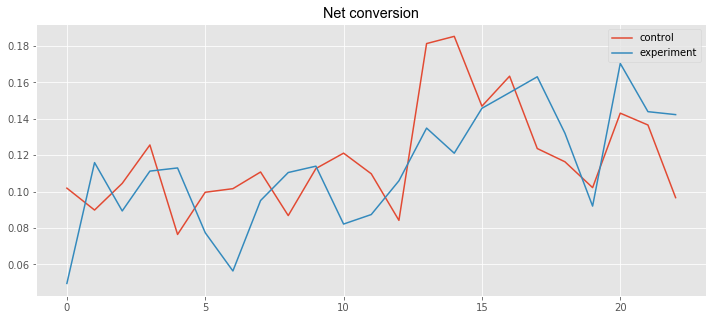

In [34]:
plt.title('Net conversion', **csfont)
line7, = plt.plot(control_data2['Payments']/control_data2['Clicks'], label='control')
line8, = plt.plot(experiment_data2['Payments']/experiment_data2['Clicks'], label='experiment')
plt.legend(handles=[line7, line8])

## Sanity Checks

Start by checking whether your invariant metrics are equivalent between the two groups. If the invariant metric is a simple count that should be randomly split between the 2 groups, you can use a binomial test as demonstrated in Lesson 5. Otherwise, you will need to construct a confidence interval for a difference in proportions using a similar strategy as in Lesson 1, then check whether the difference between group values falls within that confidence level. If your sanity checks fail, look at the day by day data and see if you can offer any insight into what is causing the problem.

In [36]:
print ("Control group:")
print ("Clicks = ", control_data['Clicks'].sum(), "   ",
      "Pageviews = ", control_data['Pageviews'].sum())
print()
print ("Experimental group:")
print ("Clicks = ", experiment_data['Clicks'].sum(), "   ",
      "Pageviews = ", experiment_data['Pageviews'].sum())

Control group:
Clicks =  28378     Pageviews =  345543

Experimental group:
Clicks =  28325     Pageviews =  344660


There are some metrics that are expected to have more or less identical values in the both experiment and control groups. I choose the number of cookies, number of clicks, and click-through probability as invariant metrics.

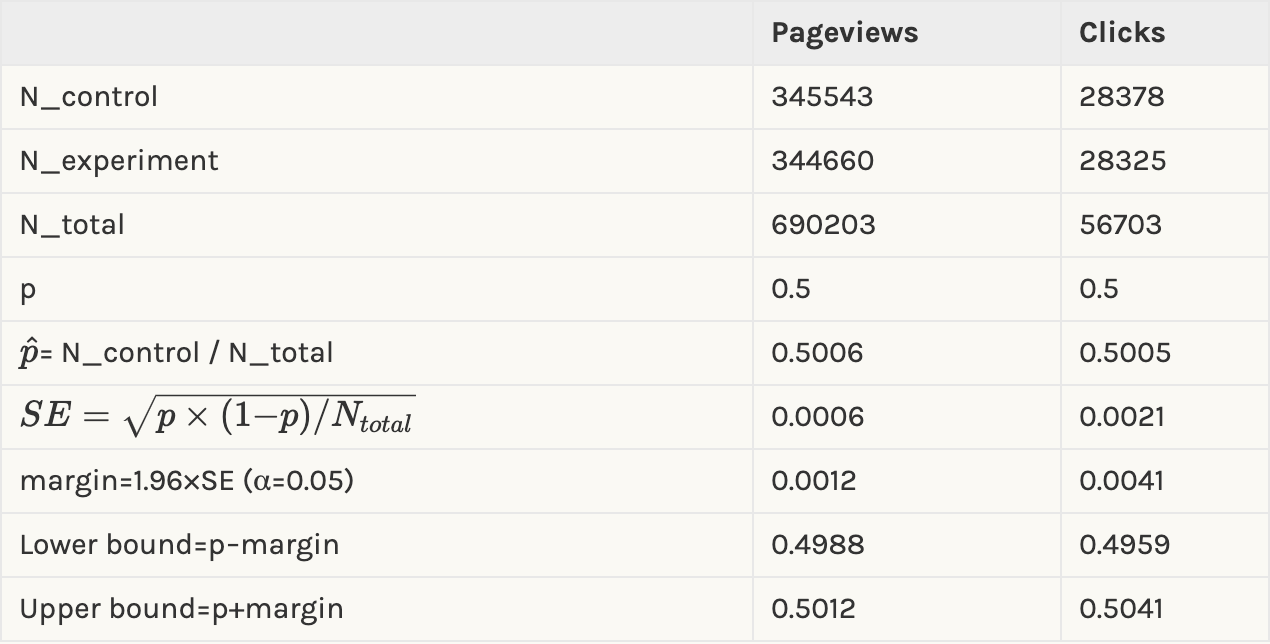

In [37]:
Image('sanity_check.png')

In [46]:
# Therefor, the result of sanity check is:
result = {'PageViews':['0.4988','0.5012','0.5006','Yes'],
         'Clicks': ['0.4959','0.5041','0.5005','Yes'],
         'CTR':['-0.00013','+0.00013','+0.000057','Yes']}
df = pd.DataFrame(result, columns = ['PageViews', 'Clicks', 'CTR'], index = ['Lower-bound', 'Upper-bound', 'Observed', 'Passes'])
df              

,PageViews,Clicks,CTR
Lower-bound,0.4988,0.4959,-0.00013
Upper-bound,0.5012,0.5041,+0.00013
Observed,0.5006,0.5005,+0.000057
Passes,Yes,Yes,Yes


## Result Analysis 

As all sanity checks were passed, and the experiment data is validated to some extent, we can go forward and analyze the evaluation metrics.

What we want to do is assessing whether the differences between evaluation metric values of the control and experiment groups are significant or not. Use 95% Confidence interval for the difference between the experiment and control group for evaluation metrics. The result is satistically significant only when the 95% confidence interval does not include zero.

In [47]:
print ("Control group:")
print ("Clicks = ", control_data2['Clicks'].sum(), "   ", \
"Enrollments = ", control_data2['Enrollments'].sum(), "   ", \
"Payments = ", control_data2['Payments'].sum())
print()
print ("Experimental group:")
print ("Clicks = ", experiment_data2['Clicks'].sum(), "   ", \
"Enrollments = ", experiment_data2['Enrollments'].sum(), "   ", \
"Payments = ", experiment_data2['Payments'].sum())

Control group:
Clicks =  17293     Enrollments =  3785.0     Payments =  2033.0

Experimental group:
Clicks =  17260     Enrollments =  3423.0     Payments =  1945.0


### Effect Size Tests

In [48]:
est = {'dmin':['0.01','0.075'],
       'Observed Difference': ['-0.0205','-0.0048'],
       'CI Lower Bound':['-0.029','-0.0116'],
       'CI Upper Bound':['-0.012','0.0019'],
       'Result':['Satistically and Practically Significant','Neither Statistically nor Practically Significant']}
df2 = pd.DataFrame(est, columns = ['dmin', 'Observed Difference', 'CI Lower Bound', 'CI Upper Bound', 'Result'], index = ['Gross Conversion', 'Net Conversion'])
df2  

,dmin,Observed Difference,CI Lower Bound,CI Upper Bound,Result
Gross Conversion,0.01,-0.0205,-0.029,-0.012,Satistically and Practically Significant
Net Conversion,0.075,-0.0048,-0.0116,0.0019,Neither Statistically nor Practically Significant


### Sign Test 

For each evaluation metric, do a sign test using the day-by-day breakdown?

In [62]:
# Supporting calculation of successful events for the evaluation metrics
Gross_conversion_success = experiment_data2['Enrollments']/experiment_data2['Clicks'] > control_data2['Enrollments']/control_data2['Clicks']
print ("Gross conversion: success =", Gross_conversion_success.sum(), "  total =", Gross_conversion_success.size)
Net_conversion_success = experiment_data2['Payments']/experiment_data2['Clicks'] > control_data2['Payments']/control_data2['Clicks']
print("Net conversion: success =", Net_conversion_success.sum(), "  total =", Net_conversion_success.size)

Gross conversion: success = 4   total = 23
Net conversion: success = 10   total = 23


--- I have used the online calculator (References, N6) for the sign tests.

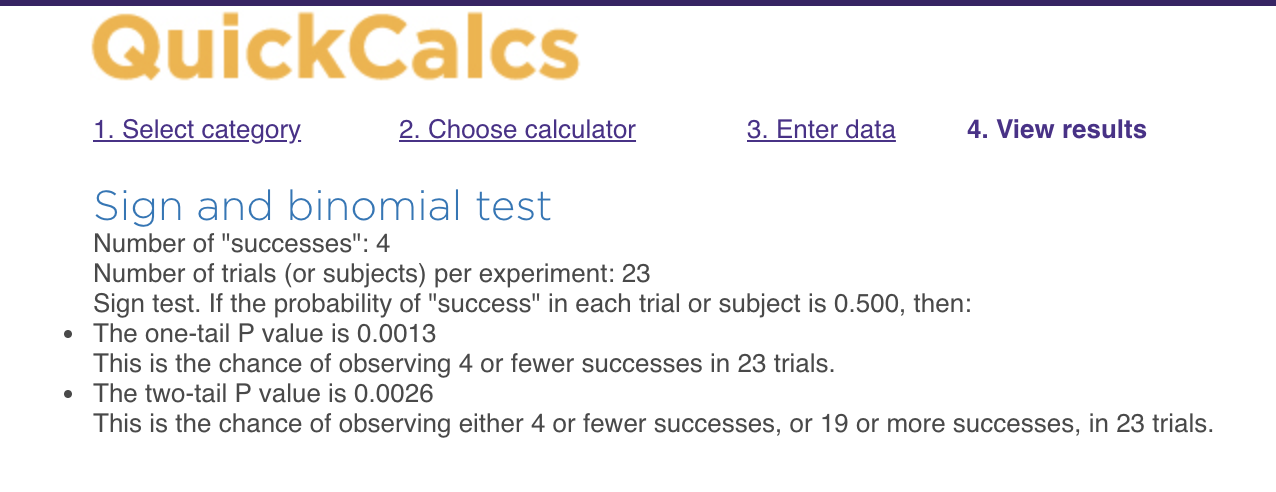

In [63]:
Image('Sign_Gross_conversion_Screenshot.png')

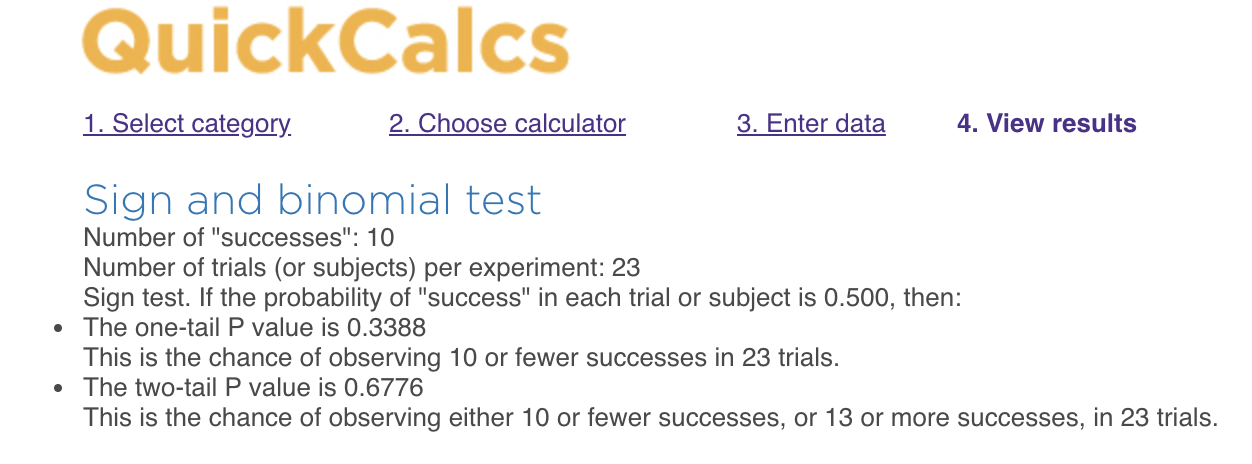

In [64]:
Image('Sign_Net_conversion_Screenshot.png')

In [65]:
st = {'p-value for sign test':['0.0026','0.6776'],
       'Statistically Significant (alpha = .05)': ['Yes','No']}
df3 = pd.DataFrame(st, columns = ['p-value for sign test', 'Statistically Significant (alpha = .05)'], index = ['Gross Conversion', 'Net Conversion'])
df3 

,p-value for sign test,Statistically Significant (alpha = .05)
Gross Conversion,0.0026,Yes
Net Conversion,0.6776,No


## Summary

An experiment was conducted in which potential Udacity students were diverted by cookie into two groups, experiment and control. The experiment group was asked to input the amount of time they are willing to devote to study, after clicking a “start free trial button”, whereas the control group was not.

Three invariant metrics (Number of Cookies, Number of clicks on “start free trial”, and Click-Through-Probability) were chosen for purposes of validation and sanity checking while Gross Conversion (enrollment/cookie) and Net Conversion (payments/cookie) served as evaluation metrics.

The null hypothesis is that there is no difference in the evaluation metrics between the groups, futhermore, a practical signifcance threshold was set for each metric.

Analysis showed the expected equal distribution of cookies into the control and experimental groups at the 95% CI. A difference in gross conversion was found to be statistically signficant at the 95% CI, and the null hypothesis was rejected. Gross conversion also met the practical signficance threshold. Net Conversion was found to be neither statistically nor practically signficant at the 95% CI.

## Recommendation 

The recommendation is not to launch the experiment change because the negative results have outweighed the positive ones.

*  Positive results of the experiment.

The difference for the gross conversion is practically significant and negative. This is a good sign: the Udacity team can lower costs by a number of trial signups.
The difference for the net conversion is not statistically significant. It means the absence of serious financial losses.

*   Negative results of the experiment:

The interval for the difference in the case of the net conversion includes negative numbers. Therefore, the team has a risk to decrease incomes.
We have not gathered enough data to draw conclusions about the retention and because of this we can not evaluate correctly the difference between the control and experimental groups for a number of students who were disappointed in studying during the free period. Consequently, we do not know enrolled users would be disappointed in the learning process less and make more payments or would not.